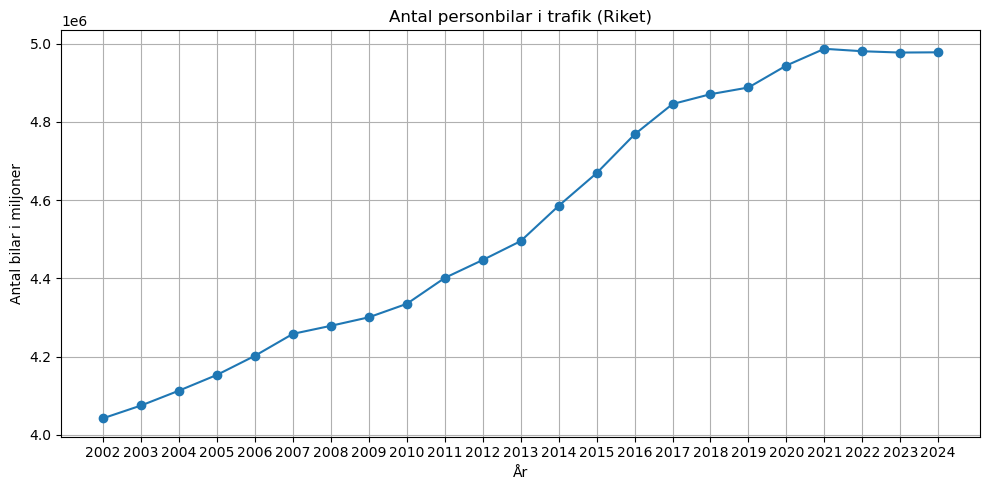

In [1]:
import requests
import json
import matplotlib.pyplot as plt

# API URL 
url = "https://api.scb.se/OV0104/v1/doris/sv/ssd/START/TK/TK1001/TK1001A/PersBilarA"

# JSON-fråga
query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "item",
        "values": ["00"]  # Riket
      }
    },
    {
      "code": "Agarkategori",
      "selection": {
        "filter": "item",
        "values": ["000"]  # Totalt
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

# Skicka POST-förfrågan
response = requests.post(url, json=query)
data = response.json()

# Extrahera år och antal bilar
år = [entry['key'][2] for entry in data['data']]
antal_bilar = [int(entry['values'][0].replace(" ", "")) for entry in data['data']]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(år, antal_bilar, marker='o')
plt.title("Antal personbilar i trafik (Riket)")
plt.xlabel("År")
plt.ylabel("Antal bilar i miljoner")
plt.grid(True)
plt.tight_layout()
plt.show()



In [3]:
!pip install -q pyscbwrapper
from pyscbwrapper import SCB
scb = SCB('sv')          # Initiera med svenska som språk
scb.go_down('TK')
scb.go_down('TK1001') 
scb.go_down('TK1001A')      
scb.info()
scb.get_query()               # Visa information om nuvarande nod
scb.get_data()




[{'id': 'PersBilarDrivMedel',
  'type': 't',
  'text': 'Nyregistrerade personbilar efter län och kommun samt drivmedel. Månad 2006M01 - 2025M03',
  'updated': '2025-04-02T08:00:00'},
 {'id': 'Fordon',
  'type': 't',
  'text': 'Fordon enligt bilregistret efter fordonsslag och bestånd. Månad 1975M01 - 2025M03',
  'updated': '2025-04-02T08:00:00'},
 {'id': 'FordonTrafik',
  'type': 't',
  'text': 'Fordon i trafik efter län och kommun samt fordonsslag. År 2002 - 2024',
  'updated': '2025-02-13T08:00:00'},
 {'id': 'PersBilarA',
  'type': 't',
  'text': 'Personbilar i trafik efter län och kommun samt ägande. År 2002 - 2024',
  'updated': '2025-02-13T08:00:00'}]

In [4]:
scb.info()

[{'id': 'PersBilarDrivMedel',
  'type': 't',
  'text': 'Nyregistrerade personbilar efter län och kommun samt drivmedel. Månad 2006M01 - 2025M03',
  'updated': '2025-04-02T08:00:00'},
 {'id': 'Fordon',
  'type': 't',
  'text': 'Fordon enligt bilregistret efter fordonsslag och bestånd. Månad 1975M01 - 2025M03',
  'updated': '2025-04-02T08:00:00'},
 {'id': 'FordonTrafik',
  'type': 't',
  'text': 'Fordon i trafik efter län och kommun samt fordonsslag. År 2002 - 2024',
  'updated': '2025-02-13T08:00:00'},
 {'id': 'PersBilarA',
  'type': 't',
  'text': 'Personbilar i trafik efter län och kommun samt ägande. År 2002 - 2024',
  'updated': '2025-02-13T08:00:00'}]